# Assignment 7 - Nicholas Thornton (vuk8az)
### Do any five.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, poisson, bernoulli, logistic
import scipy.stats as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf

from skimpy import skim
from statsmodels.discrete.discrete_model import Logit, Poisson

sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

## 1.

- What is the expected value of a single die roll?

$$
E[X] = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5
$$

- What is the expected value of rolling two dice and adding the results together?

$$
E[X_1 + X_2] = E[X_1] + E[X_2] = 3.5 + 3.5 = 7
$$

- What is the expected winnings of any gamble in European roulette?

$$
E[\text{winnings}] = \frac{1}{37}(36) + \frac{36}{37}(-1) = -0.027 \approx -0.03
$$

- Imagine you roll a die, and you record the value you get. But if you roll a six, you roll again, and add that value. What is the expected value?

$$
E[X] = \frac{1}{6}(1 + 2 + 3 + 4 + 5 + (6 + 3.5)) = 4.083
$$

- Imagine that the process continues until you fail to roll a six. What is the expected value of the process?

$$
J = \frac{1}{6}(1 + 2 + 3 + 4 + 5 + (6 + J))
$$

$$
J = 4.2
$$

**Final Answer:** The expected value of the process is **4.2**.



- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

Simulated expected value: 4.1960


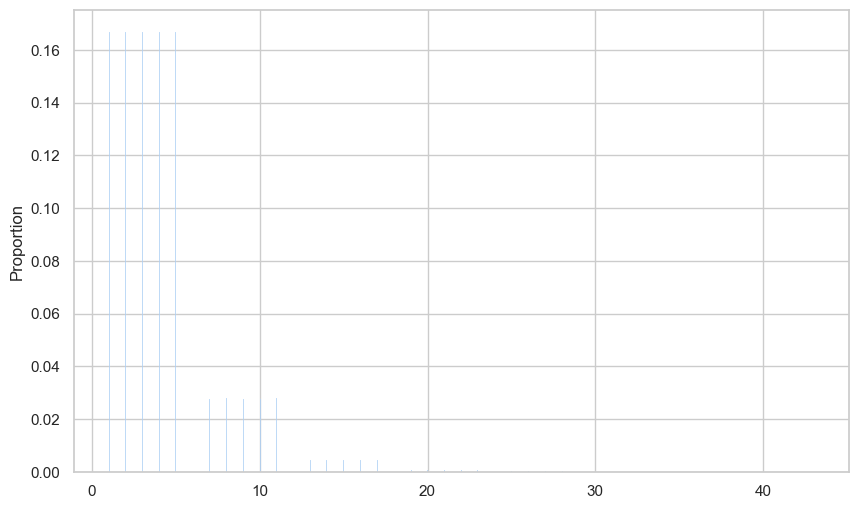

In [3]:
rng = np.random.default_rng(100)

def simulate():
    total = 0
    on = True
    while on:
        roll = rng.integers(1, 7)
        total += roll
        if roll < 6:
            on = False
    return total

results = [simulate() for _ in range(1_000_000)]
print(f"Simulated expected value: {np.mean(results):.4f}")
sns.histplot(results, stat='proportion')
plt.show()


## 2. 

- Compute the expected value for a uniform random variable.

We have to solve

$$
\int_0^1 x \times 1 \, dx = \int_0^1 d\left(\frac{1}{2}x^2\right) = \frac{1}{2}1^2 - \frac{1}{2}0^2 = \frac{1}{2}
$$

- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$.

This follows from a basic property of the integral:

$$
\mathbb{E}[a+bX] = \int_{-\infty}^{+\infty} (a + bx)f(x)\,dx 
= \int_{-\infty}^{+\infty} af(x) + bxf(x)\,dx 
= a\int_{-\infty}^{+\infty} f(x)\,dx + b\int_{-\infty}^{+\infty} xf(x)\,dx 
= a + b\mathbb{E}[X]
$$

since $\int_a^b f(x)\,dx = F(b) - F(a)$, and $F(-\infty)=0$ and $F(+\infty)=1$.

- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$.

Let $X \sim U(0,1)$ and $v(x)=\sqrt{x}$.

$$
\mathbb{E}[v(X)] = \int_0^1 \sqrt{x}\,dx = \frac{2}{3} \approx 0.6687
$$

$$
v(\mathbb{E}[X]) = \sqrt{\mathbb{E}[X]} = \sqrt{0.5} \approx 0.7071
$$

These are not equal, confirming that the expectation of a transformed random variable is not the same as the transformation of the expected value, unless the transformation is linear.



Expected Value: 0.667920770963503
Value of Expectation: 0.7083930567176308


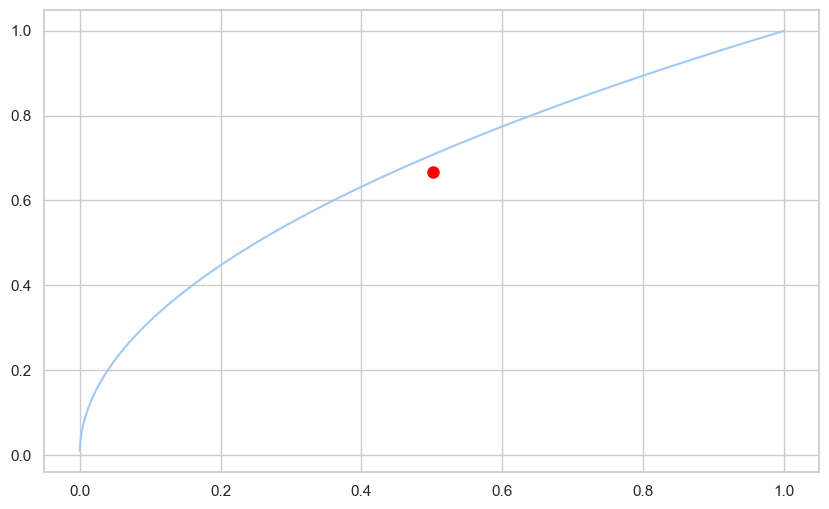

In [4]:
def v(x):
    return np.sqrt(x)

sample = np.random.uniform(low=0, high=1,size = 20000)

Ev_of_sample = np.mean( v(sample) )
print(f'Expected Value: {Ev_of_sample}')

v_of_EX = v(np.mean(sample))
print(f'Value of Expectation: {v_of_EX}')

sns.lineplot(x=sample, y=v(sample))
plt.plot(np.mean(sample),Ev_of_sample, 'o', color='red', markersize=8)

## 3.

- Compute the variance for a uniform random variable.

We know from Problem 2 that the expectation is $\mathbb{E}[X] = 0.5$. For $X \sim U(0,1)$, the variance is

$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$

Compute $\mathbb{E}[X^2]$:

$$
\mathbb{E}[X^2] = \int_0^1 x^2 \, dx = \left[ \frac{1}{3}x^3 \right]_0^1 = \frac{1}{3}
$$

Thus,

$$
\mathbb{V}[X] = \frac{1}{3} - \left( \frac{1}{2} \right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}
$$

- Show that $\mathbb{V}[a + bX] = b^2 \mathbb{V}[X]$.

Starting from the definition of variance:

$$
\mathbb{V}[a + bX] = \mathbb{E}[(a + bX - \mathbb{E}[a + bX])^2]
$$

Substitute $\mathbb{E}[a + bX] = a + b\mathbb{E}[X]$:

$$
\mathbb{V}[a + bX] = \mathbb{E}[(a + bX - a - b\mathbb{E}[X])^2]
= \mathbb{E}[(bX - b\mathbb{E}[X])^2]
= b^2 \mathbb{E}[(X - \mathbb{E}[X])^2]
= b^2 \mathbb{V}[X]
$$

- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a + b\mathbb{E}[X]$ and variance $b^2\sigma_X^2$.

Let $X \sim \mathcal{N}(\mu_X, \sigma_X^2)$. The transformation $Y = a + bX$ yields

$$
\mathbb{E}[Y] = a + b\mathbb{E}[X] = a + b\mu_X
$$

and

$$
\mathbb{V}[Y] = b^2 \mathbb{V}[X] = b^2 \sigma_X^2
$$

Thus, $Y \sim \mathcal{N}(a + b\mu_X, b^2\sigma_X^2)$.


## 4. 

- The covariance of $X$ and $Y$ is defined as

$$
\operatorname{cov}(X,Y) = \int_y \int_x (x - \mathbb{E}[X])(y - \mathbb{E}[Y]) f_{XY}(x,y) \, dx \, dy = \mathbb{E}_{XY}[(X - \mu_X)(Y - \mu_Y)]
$$

- Show that if $f_{XY}(x,y) = f_X(x)f_Y(y)$, then $\operatorname{cov}(X,Y) = 0$.

If $X$ and $Y$ are independent, their joint density factorizes:

$$
f_{XY}(x,y) = f_X(x)f_Y(y)
$$

Then

$$
\operatorname{cov}(X,Y) = \int_y \int_x (x - \mathbb{E}[X])(y - \mathbb{E}[Y]) f_X(x)f_Y(y) \, dx \, dy
$$

Separating the integrals gives

$$
\operatorname{cov}(X,Y) = \left(\int_x (x - \mathbb{E}[X]) f_X(x)\,dx\right) \left(\int_y (y - \mathbb{E}[Y]) f_Y(y)\,dy\right)
$$

Each term in parentheses is zero, so

$$
\operatorname{cov}(X,Y) = 0
$$

- Provide an example (computation/simulation is fine) where $\operatorname{cov}(X,Y) \approx 0$ but $f_{XY}(x,y) \neq f_X(x)f_Y(y)$.

Let $X \sim \mathcal{N}(0,1)$ and define $Y = X^2$.
Then $X$ and $Y$ are clearly dependent, but their covariance is approximately zero because the relationship is nonlinear.


In [5]:
rng = np.random.default_rng(100)
X = rng.standard_normal(100000)
Y = X**2
print(np.cov(X, Y, ddof=0)[0,1])

0.006328415454929359


## 5.

Suppose $X$ has an expectation $\mathbb{E}[X] < \infty$ and variance $\mathbb{V}[X] < \infty$; this isn’t always true, but it is *usually* true.

- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$.

What’s the expectation of $\varepsilon$?

$$
\mathbb{E}[\varepsilon] = \int (x - \mathbb{E}[X]) f(x) dx = \int x f(x) dx - \mathbb{E}[X] \int f(x) dx = \mathbb{E}[X] - \mathbb{E}[X] = 0
$$

What’s the variance of $\varepsilon$?

$$
\mathbb{V}[\varepsilon] = \int (x - \mathbb{E}[X] - \mathbb{E}[x - \mathbb{E}[X]])^2 f(x) dx = \int (x - \mathbb{E}[X])^2 f(x) dx = \mathbb{V}[X]
$$

- So we can write any random variable in the form

$$
X = \mathbb{E}[X] + \varepsilon
$$

where $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$.

- If that’s true, we can also write any random variable in standardized form:

$$
X = \mathbb{E}[X] + \sigma_X \varepsilon
$$

where $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{V}[\varepsilon] = 1$.

Rearranging gives $X$ as its mean plus a scaled shock term. Taking expectations:

$$
\mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X] + \sigma_X \varepsilon] = \mathbb{E}[X] + \sigma_X \mathbb{E}[\varepsilon] = \mathbb{E}[X]
$$

and the variance:

$$
\mathbb{V}[X] = \mathbb{V}[\mathbb{E}[X] + \sigma_X \varepsilon] = \sigma_X^2 \mathbb{V}[\varepsilon] = \sigma_X^2
$$

This decomposition allows us to express a random variable in terms of its mean and variance components.  

- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for **regression models**.


## 6.

- Use the Taylor series expansions

$$
F(x + h) = F(x) + hf(x) + \frac{h^2}{2} f'(x) + O(h^3)
$$

and

$$
F(x - h) = F(x) - hf(x) + \frac{h^2}{2} f'(x) + O(h^3)
$$

to show that

$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x + h) - F(x - h)}{2h} = f(x) + O(h^2)
$$

so the bias of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

---

Starting from the Taylor series:

$$
F(x + h) - F(x - h)
= \big(F(x) + hf(x) + \frac{h^2}{2} f'(x) + O(h^3)\big)
- \big(F(x) - hf(x) + \frac{h^2}{2} f'(x) + O(h^3)\big)
$$

Simplifying:

$$
F(x + h) - F(x - h) = 2hf(x) + O(h^3)
$$

Dividing both sides by $2h$:

$$
\frac{F(x + h) - F(x - h)}{2h} = f(x) + O(h^2)
$$

Thus,

$$
\mathbb{E}[\hat{f}_{X,h}(x)] = f(x) + O(h^2)
$$

indicating that the bias of the kernel density estimator is of order $O(h^2)$.
In contrast, for the empirical CDF, $\mathbb{E}[\hat{F}(x)] = F(x)$ exactly, so it is unbiased.


## 7.

- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho = 0$, then $X$ and $Y$ are independent.

For a bivariate normal distribution, the joint density is

$$
f_{XY}(x, y) = \frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1 - \rho^2}} 
\exp\left\{-\frac{1}{2(1 - \rho^2)} 
\left[
\left(\frac{x - \mu_X}{\sigma_X}\right)^2 
+ \left(\frac{y - \mu_Y}{\sigma_Y}\right)^2 
- 2\rho\frac{(x - \mu_X)(y - \mu_Y)}{\sigma_X\sigma_Y}
\right]\right\}
$$

When $\rho = 0$, this simplifies to

$$
f_{XY}(x, y) = \frac{1}{2\pi\sigma_X\sigma_Y}
\exp\left\{-\frac{1}{2}\left[
\left(\frac{x - \mu_X}{\sigma_X}\right)^2
+ \left(\frac{y - \mu_Y}{\sigma_Y}\right)^2
\right]\right\}
$$

which factors into

$$
f_{XY}(x, y) = f_X(x) f_Y(y)
$$

Therefore, $X$ and $Y$ are **independent** when $\rho = 0$.

---

- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, \ldots, X_n$ are independent.

For the multivariate normal,

$$
f_X(x_1, \ldots, x_n) = 
\frac{1}{\sqrt{(2\pi)^n \det(\Sigma)}} 
\exp\left(-\frac{1}{2}(x - \mu)^\top \Sigma^{-1}(x - \mu)\right)
$$

If $\Sigma$ is diagonal,

$$
\Sigma = 
\begin{bmatrix}
\sigma_1^2 & 0 & \cdots & 0 \\
0 & \sigma_2^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_n^2
\end{bmatrix}
$$

then

$$
\Sigma^{-1} = 
\begin{bmatrix}
1/\sigma_1^2 & 0 & \cdots & 0 \\
0 & 1/\sigma_2^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1/\sigma_n^2
\end{bmatrix}
$$

The exponent separates into a sum of independent quadratic terms:

$$
(x - \mu)^\top \Sigma^{-1} (x - \mu) 
= \sum_{i=1}^n \frac{(x_i - \mu_i)^2}{\sigma_i^2}
$$

So the joint density becomes

$$
f_X(x_1, \ldots, x_n) = 
\prod_{i=1}^n 
\frac{1}{\sqrt{2\pi}\sigma_i}
\exp\left(-\frac{(x_i - \mu_i)^2}{2\sigma_i^2}\right)
$$

which clearly factorizes into the product of the marginals, showing that the $X_i$’s are **independent**.

---

- For the multivariate normal, show that if $\Sigma$ is diagonal and all $\sigma_i^2$ and $\mu_i$ are equal, then $X_1, X_2, \ldots, X_n$ are independent and identically distributed as

$$
X_i \sim \mathcal{N}(\mu, \sigma^2)
$$

In that case, the joint density simplifies to

$$
f_X(x_1, \ldots, x_n) =
\prod_{i=1}^n
\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

which is the joint distribution of $n$ **independent and identically distributed normal variables**, each with mean $\mu$ and variance $\sigma^2$.


## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.

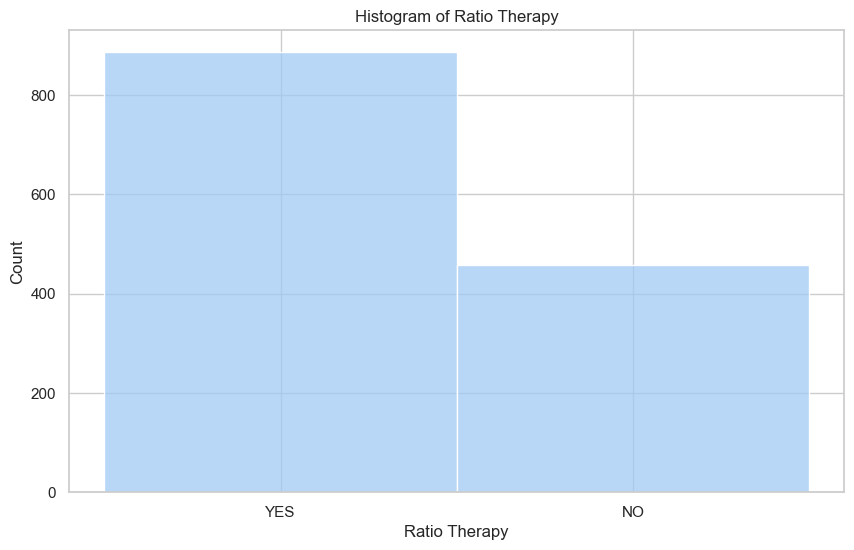

In [6]:
metabric = pd.read_csv("data/metabric.csv")

sns.histplot(metabric["Radio Therapy"].dropna(), bins=10, kde=False)
plt.title("Histogram of Ratio Therapy")
plt.xlabel("Ratio Therapy")
plt.ylabel("Count")
plt.show()

- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$


- Write out the likelihood.

For $n$ patients, assuming independence:

$$
L(p) = \prod_{i=1}^{n} p^{y_i}(1 - p)^{1 - y_i}
$$

Taking logs:

$$
\log L(p) = \sum_{i=1}^{n} [y_i \log p + (1 - y_i)\log(1 - p)]
$$

- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?

To maximize $\log L(p)$ with respect to $p$, set the derivative to zero:

$$
\frac{\partial \log L(p)}{\partial p} = \sum_{i=1}^{n} \left(\frac{y_i}{p} - \frac{1 - y_i}{1 - p}\right) = 0
$$

Simplifying gives:

$$
\hat{p} = \frac{1}{n}\sum_{i=1}^{n} y_i
$$

So, the MLE $\hat{p}$ is simply the sample mean of the binary treatment variable.


In [7]:
y = metabric["Radio Therapy"].str.strip().str.lower().map({"yes": 1, "no": 0})

y = y.dropna()

p_hat = y.mean()
print(f"MLE (p̂): {p_hat:.4f}")

MLE (p̂): 0.6597


- Bootstrap Sampling Distribution of $\hat{p}$

To estimate the sampling variability of $\hat{p}$, we can use a bootstrap approach.  
This involves resampling with replacement many times and computing $\hat{p}$ for each bootstrap sample.


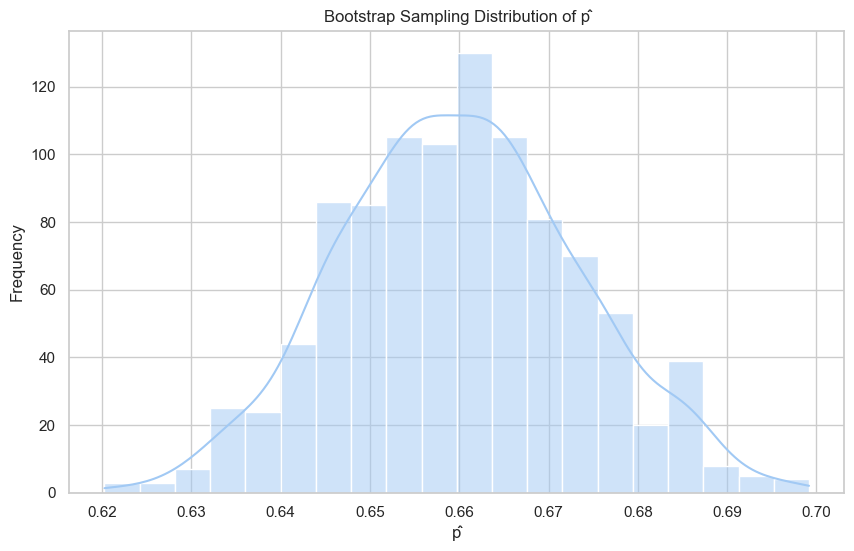

Bootstrap mean: 0.6600
Bootstrap SD: 0.0133


In [8]:
B = 1000
boot_p = np.array([y.sample(frac=1, replace=True).mean() for _ in range(B)])

sns.histplot(boot_p, bins=20, kde=True)
plt.title("Bootstrap Sampling Distribution of p̂")
plt.xlabel("p̂")
plt.ylabel("Frequency")
plt.show()

print(f"Bootstrap mean: {boot_p.mean():.4f}")
print(f"Bootstrap SD: {boot_p.std():.4f}")


## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)


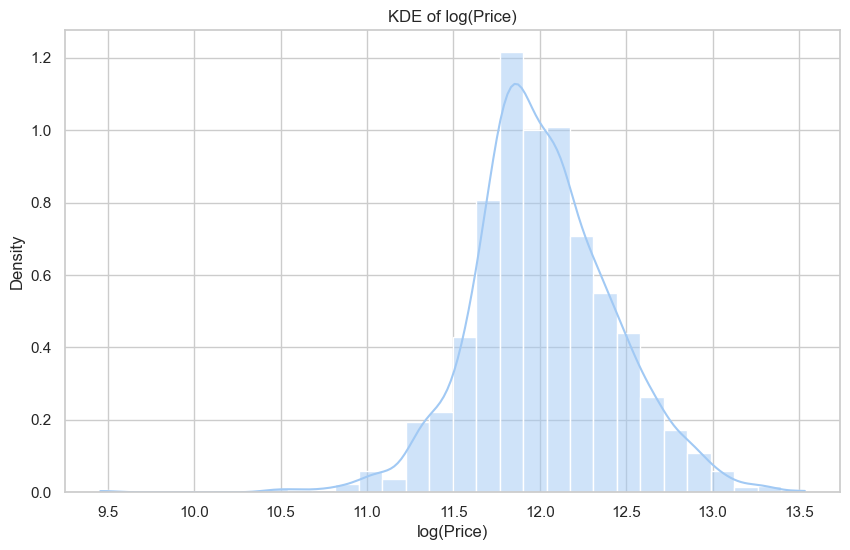

In [9]:
ames = pd.read_csv("data/ames_prices.csv")

y = np.log(ames["price"])

sns.histplot(y, stat="density", bins=30, kde=True)
plt.title("KDE of log(Price)")
plt.xlabel("log(Price)")
plt.ylabel("Density")
plt.show()

After taking the logarithm, the data appear roughly symmetric and bell-shaped, suggesting a **Normal distribution** for $\log(\text{price})$.   This implies that the original price variable follows a **Lognormal distribution**, which is common for right-skewed economic data.

- Derive the density for this distribution.

For a normal random variable $Y = \log(\text{price})$ with mean $\mu$ and variance $\sigma^2$:

$$
f_Y(y) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{y - \mu}{\sigma}\right)^2}
$$

The likelihood for $n$ independent samples $y_1, \dots, y_n$ is:

$$
L(\mu, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{y_i - \mu}{\sigma}\right)^2}
$$


- Write out the likelihood.  
- Maximize the likelihood. What is the MLE?

Taking logs and differentiating gives:

$$
\ell(\mu, \sigma) = -n\log(\sigma) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2 + \text{constant}
$$

Setting derivatives to zero gives the MLEs:

$$
\hat{\mu} = \bar{y}, \quad \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2
$$


In [10]:
mu_hat = np.mean(y)
sigma_hat = np.sqrt(np.mean((y - mu_hat)**2))

print(f"MLE μ̂: {mu_hat:.4f}")
print(f"MLE σ̂: {sigma_hat:.4f}")


MLE μ̂: 12.0210
MLE σ̂: 0.4075


- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.

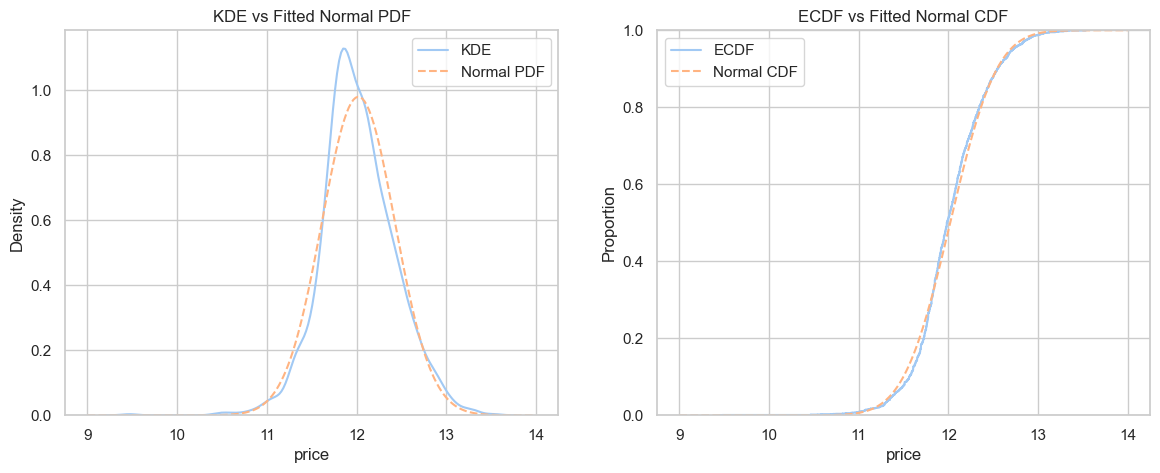

In [11]:
grid = np.linspace(9, 14, 200)
pdf = sp.norm.pdf(grid, loc=mu_hat, scale=sigma_hat)
cdf = sp.norm.cdf(grid, loc=mu_hat, scale=sigma_hat)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE vs Normal PDF
sns.kdeplot(x=y, ax=axes[0], label="KDE")
sns.lineplot(x=grid, y=pdf, ax=axes[0], label="Normal PDF", linestyle="--")
axes[0].set_title("KDE vs Fitted Normal PDF")
axes[0].legend()

# ECDF vs Normal CDF
sns.ecdfplot(x=y, ax=axes[1], label="ECDF")
sns.lineplot(x=grid, y=cdf, ax=axes[1], label="Normal CDF", linestyle="--")
axes[1].set_title("ECDF vs Fitted Normal CDF")
axes[1].legend()

plt.show()


The fitted normal model aligns closely with the KDE and ECDF of $\log(\text{price})$. There is slight deviation in the tails, suggesting minor skewness, but the overall fit is strong. If we modeled the untransformed prices, a **Lognormal** model would have been more appropriate due to the heavy right tail.

- Bootstrap the sampling density/distribution of your parameters.

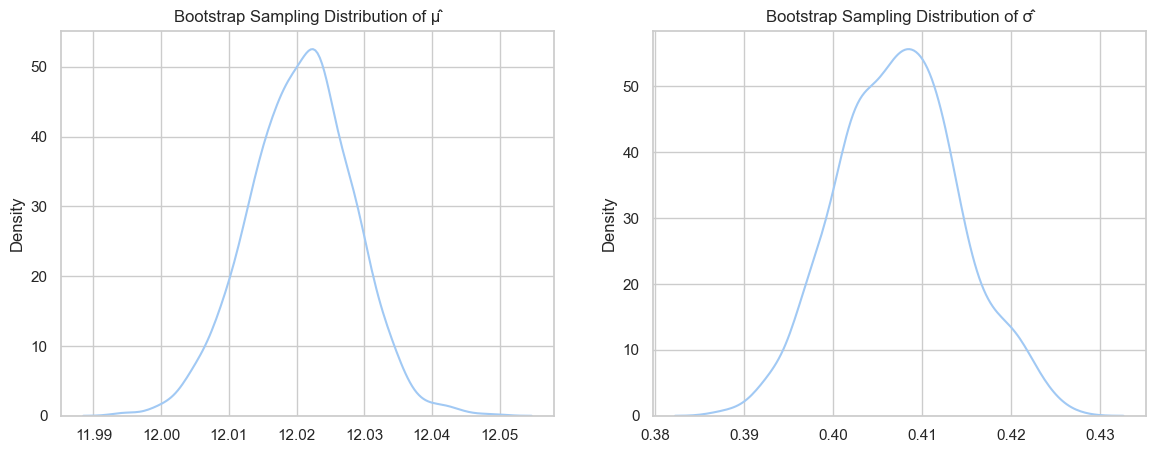

Bootstrap mean μ̂: 12.0207, SD: 0.0076
Bootstrap mean σ̂: 0.4075, SD: 0.0069


In [12]:
def mle(y):
    mu_hat = np.mean(y)
    sigma_hat = np.sqrt(np.mean((y - mu_hat)**2))
    return mu_hat, sigma_hat

B = 1000
boot_samples = [mle(y.sample(frac=1, replace=True)) for _ in range(B)]

boot_mu = [b[0] for b in boot_samples]
boot_sigma = [b[1] for b in boot_samples]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.kdeplot(x=boot_mu, ax=axes[0])
axes[0].set_title("Bootstrap Sampling Distribution of μ̂")

sns.kdeplot(x=boot_sigma, ax=axes[1])
axes[1].set_title("Bootstrap Sampling Distribution of σ̂")

plt.show()

print(f"Bootstrap mean μ̂: {np.mean(boot_mu):.4f}, SD: {np.std(boot_mu):.4f}")
print(f"Bootstrap mean σ̂: {np.mean(boot_sigma):.4f}, SD: {np.std(boot_sigma):.4f}")


The bootstrap sampling distributions of $\hat{\mu}$ and $\hat{\sigma}$ are both approximately normal, indicating stable parameter estimates. This confirms that the normal model for $\log(\text{price})$ is a good representation of the data under the MLE framework.


## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$


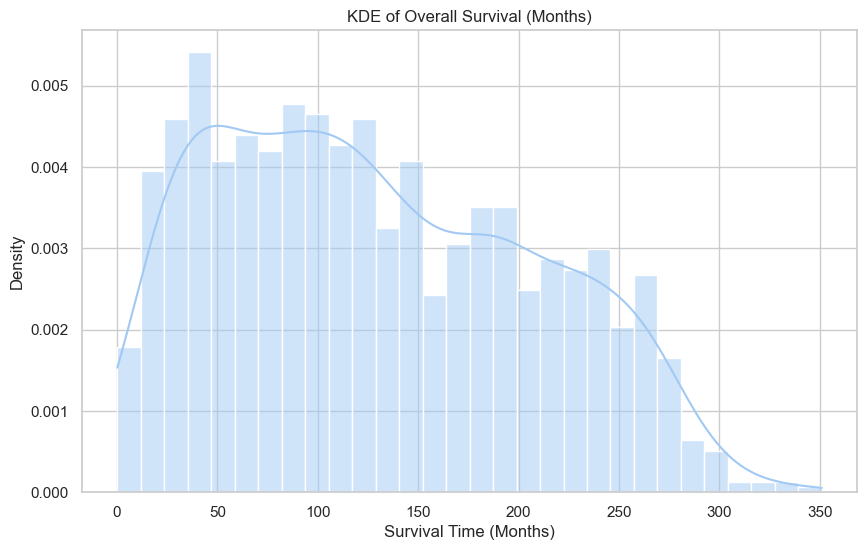

In [13]:
metabric = pd.read_csv("data/metabric.csv")
t = metabric["Overall Survival (Months)"].dropna()

sns.histplot(t, stat="density", bins=30, kde=True)
plt.title("KDE of Overall Survival (Months)")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Density")
plt.show()

The distribution of survival times is strictly positive and heavily right-skewed, consistent with the Exponential model assumption of a constant hazard rate over time.  

- Derive the density for this distribution.  

The cumulative distribution function (CDF) of $T$ is:
$$
F(t) = 1 - e^{-\lambda t}, \quad t \ge 0.
$$

Differentiating gives the **probability density function (PDF)**:
$$
f(t) = \lambda e^{-\lambda t}, \quad t \ge 0.
$$

- Write out the likelihood.  
- Maximize the likelihood with respect to $\lambda$. What is the MLE $\hat{\lambda}$?  

For $n$ independent observations $t_1, t_2, \dots, t_n$:

$$
L(\lambda) = \prod_{i=1}^n \lambda e^{-\lambda t_i}
= \lambda^n e^{-\lambda \sum t_i}.
$$

Taking logs:
$$
\ell(\lambda) = n \log(\lambda) - \lambda \sum_{i=1}^n t_i.
$$

Differentiating and setting to zero:
$$
\frac{\partial \ell(\lambda)}{\partial \lambda} = \frac{n}{\lambda} - \sum_{i=1}^n t_i = 0.
$$

Thus, the MLE is:
$$
\hat{\lambda} = \frac{n}{\sum_{i=1}^n t_i} = \frac{1}{\bar{t}}.
$$



In [14]:
lambda_hat = 1 / np.mean(t)
print(f"MLE λ̂: {lambda_hat:.4f}")

MLE λ̂: 0.0077


- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.


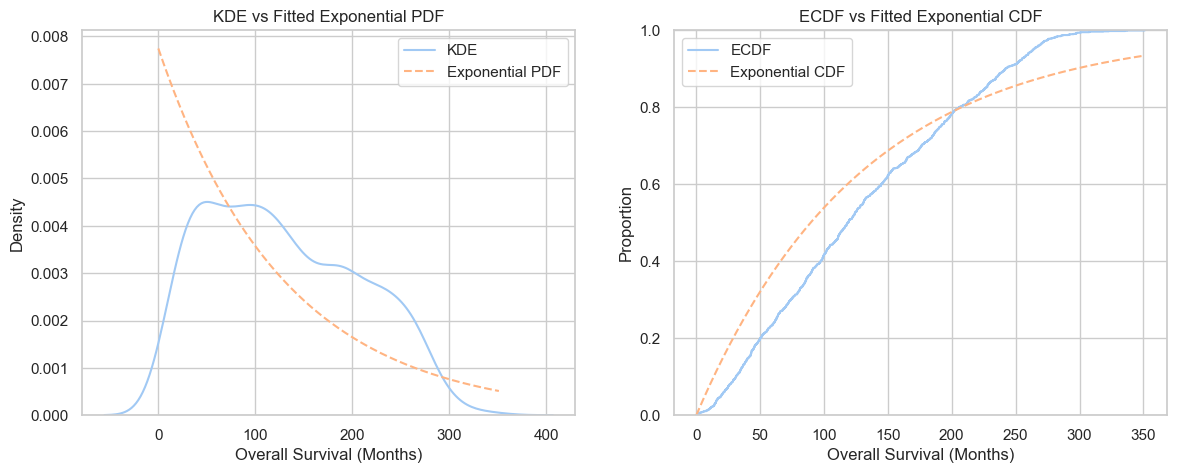

In [15]:
grid = np.linspace(0, t.max(), 200)
pdf = sp.expon.pdf(grid, scale=1/lambda_hat)
cdf = sp.expon.cdf(grid, scale=1/lambda_hat)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE vs Exponential PDF
sns.kdeplot(x=t, ax=axes[0], label="KDE")
sns.lineplot(x=grid, y=pdf, ax=axes[0], label="Exponential PDF", linestyle="--")
axes[0].set_title("KDE vs Fitted Exponential PDF")
axes[0].legend()

# ECDF vs Exponential CDF
sns.ecdfplot(x=t, ax=axes[1], label="ECDF")
sns.lineplot(x=grid, y=cdf, ax=axes[1], label="Exponential CDF", linestyle="--")
axes[1].set_title("ECDF vs Fitted Exponential CDF")
axes[1].legend()

plt.show()


The fitted exponential model captures the overall decay pattern of survival times but slightly underestimates early failures and overestimates long survivors. This deviation suggests the hazard rate may not be constant—indicating that a Weibull or Gamma model, which allows for changing hazard over time, could better describe the data.


- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

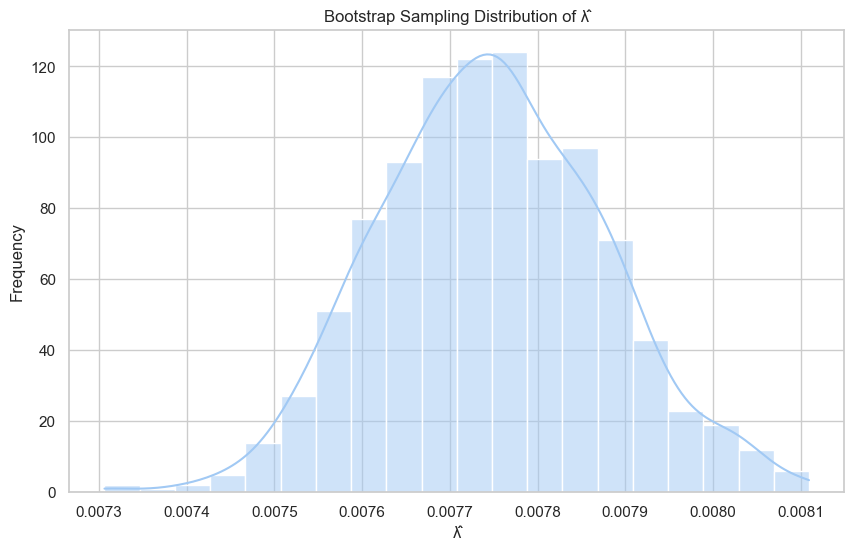

Bootstrap mean λ̂: 0.0077
Bootstrap SD: 0.0001


In [16]:
B = 1000
boot_lambda = np.array([
    1 / np.mean(t.sample(frac=1, replace=True))
    for _ in range(B)
])

sns.histplot(boot_lambda, bins=20, kde=True)
plt.title("Bootstrap Sampling Distribution of λ̂")
plt.xlabel("λ̂")
plt.ylabel("Frequency")
plt.show()

print(f"Bootstrap mean λ̂: {boot_lambda.mean():.4f}")
print(f"Bootstrap SD: {boot_lambda.std():.4f}")


The bootstrap distribution of $\hat{\lambda}$ is approximately normal and centered near the analytical MLE, confirming estimator stability. The small standard deviation indicates low sampling variability and precise estimation of the underlying event rate.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$


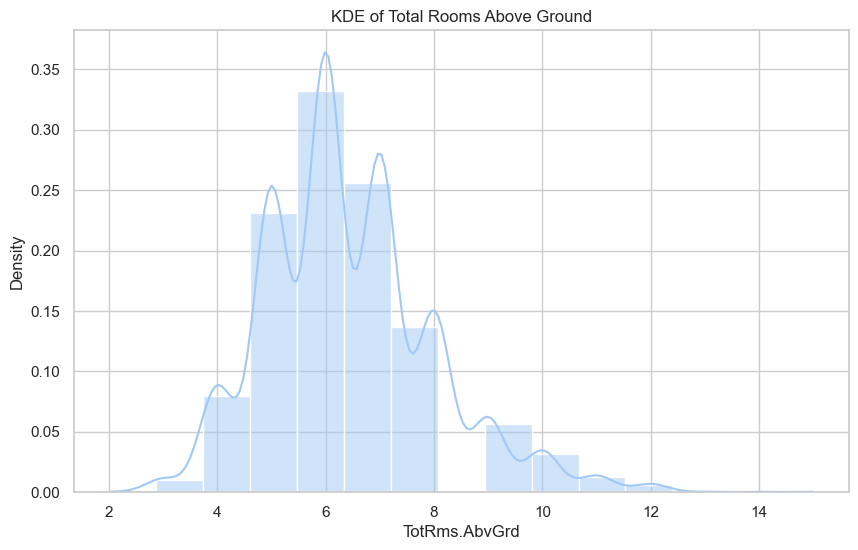

In [17]:
y = ames["TotRms.AbvGrd"].dropna()

sns.histplot(y, stat="density", bins=15, kde=True)
plt.title("KDE of Total Rooms Above Ground")
plt.xlabel("TotRms.AbvGrd")
plt.ylabel("Density")
plt.show()

The variable `TotRms.AbvGrd` is discrete and right-skewed, taking integer values from 2 to around 14.  
A **Poisson distribution** is appropriate since it models non-negative integer counts where variance roughly scales with the mean.

- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)

For $n$ independent observations $y_1, y_2, \dots, y_n$, the likelihood is

$$
L(\lambda) = \prod_{i=1}^n \frac{\lambda^{y_i} e^{-\lambda}}{y_i!}
= \lambda^{\sum y_i} e^{-n\lambda} \prod_{i=1}^n \frac{1}{y_i!}.
$$

Taking logs:

$$
\ell(\lambda) = \sum_{i=1}^n y_i \log(\lambda) - n\lambda - \sum_{i=1}^n \log(y_i!).
$$

Differentiating and setting to zero:

$$
\frac{d\ell}{d\lambda} = \frac{\sum y_i}{\lambda} - n = 0
\Rightarrow \hat{\lambda} = \bar{y}.
$$



In [18]:
lambda_hat = np.mean(y)
print(f"MLE λ̂: {lambda_hat:.4f}")


MLE λ̂: 6.4430


- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.

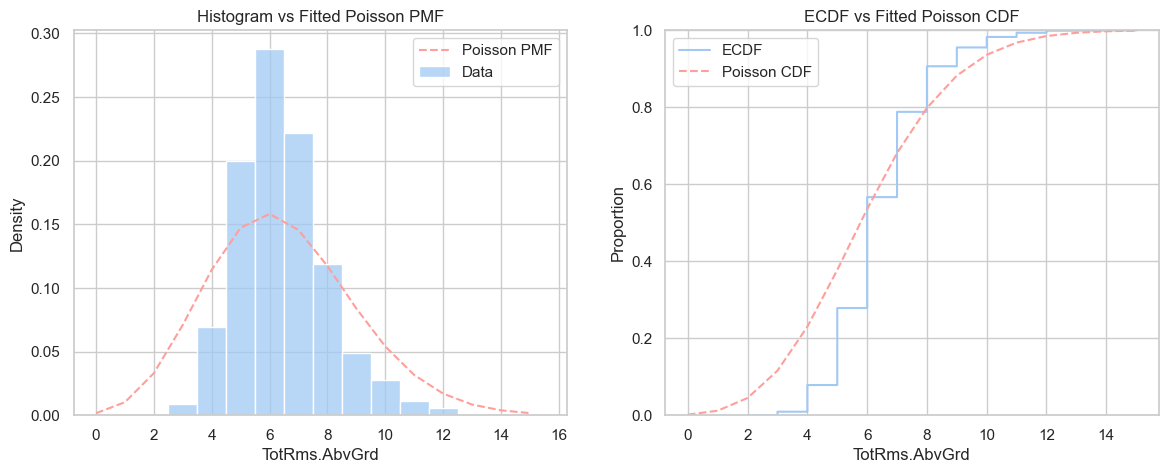

In [19]:
grid = np.arange(0, y.max() + 1)
pmf = sp.poisson.pmf(grid, mu=lambda_hat)
cdf = sp.poisson.cdf(grid, mu=lambda_hat)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram vs Poisson PMF
sns.histplot(y, stat="density", bins=len(grid), discrete=True, ax=axes[0], label="Data")
axes[0].plot(grid, pmf, "r--", label="Poisson PMF")
axes[0].set_title("Histogram vs Fitted Poisson PMF")
axes[0].legend()

# ECDF vs Poisson CDF
sns.ecdfplot(y, ax=axes[1], label="ECDF")
axes[1].plot(grid, cdf, "r--", label="Poisson CDF")
axes[1].set_title("ECDF vs Fitted Poisson CDF")
axes[1].legend()

plt.show()

The fitted Poisson model captures the overall shape of room counts but slightly underestimates 
the upper tail, suggesting some overdispersion (variance greater than mean). A **Negative Binomial** model could handle this overdispersion more flexibly.


- Bootstrap the sampling density/distribution of your parameter.

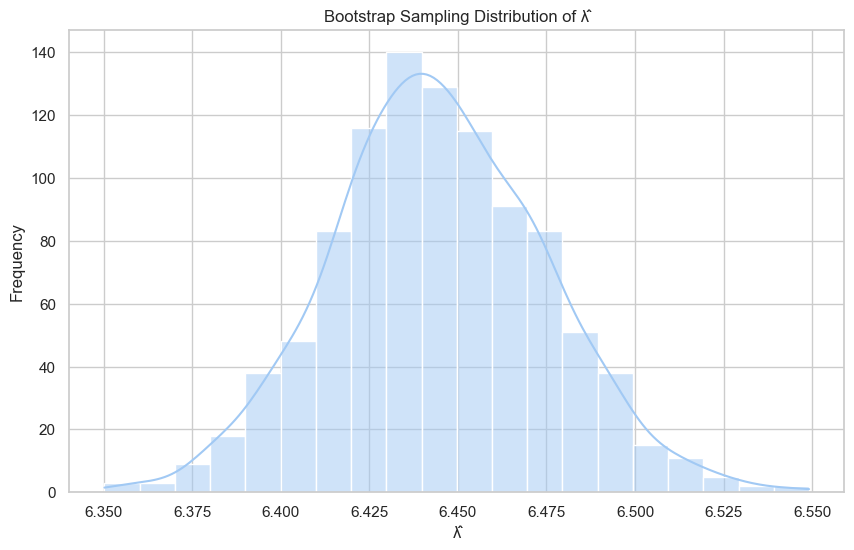

Bootstrap mean λ̂: 6.4443
Bootstrap SD: 0.0301


In [20]:
B = 1000
boot_lambda = np.array([
    y.sample(frac=1, replace=True).mean()
    for _ in range(B)
])

sns.histplot(boot_lambda, bins=20, kde=True)
plt.title("Bootstrap Sampling Distribution of λ̂")
plt.xlabel("λ̂")
plt.ylabel("Frequency")
plt.show()

print(f"Bootstrap mean λ̂: {boot_lambda.mean():.4f}")
print(f"Bootstrap SD: {boot_lambda.std():.4f}")


The bootstrap distribution of $\hat{\lambda}$ is approximately normal and centered near the analytical MLE, confirming estimator stability. The small standard deviation indicates low variability.


## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$


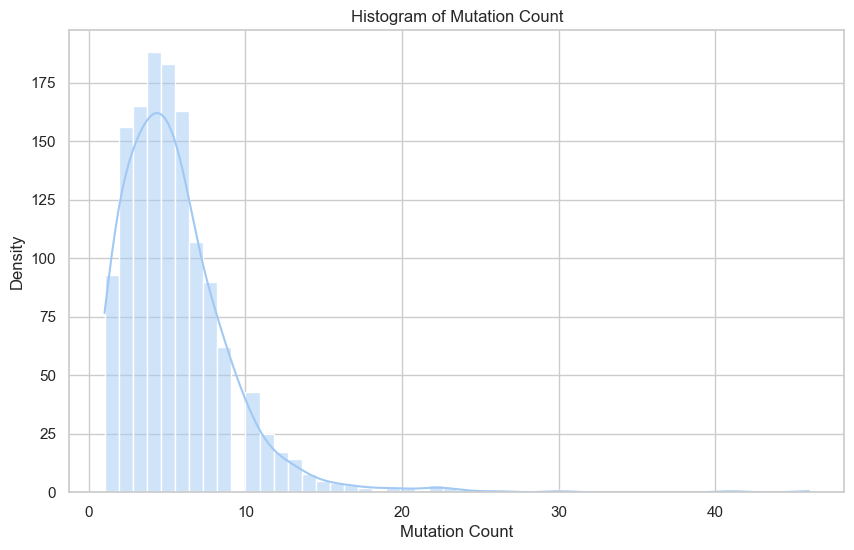

In [21]:
metabric = pd.read_csv("data/metabric.csv")
y = metabric["Mutation Count"].dropna()

sns.histplot(y, bins=50, kde=True)
plt.title("Histogram of Mutation Count")
plt.xlabel("Mutation Count")
plt.ylabel("Density")
plt.show()


The variable `Mutation Count` is discrete and right-skewed, taking non-negative integer values. A **Poisson distribution** is a natural choice for modeling such count data, as it assumes the mean equals the variance and models the frequency of discrete events.


- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)

For $n$ independent observations $y_1, y_2, \dots, y_n$, the likelihood is:

$$
L(\lambda) = \prod_{i=1}^{n} \frac{\lambda^{y_i} e^{-\lambda}}{y_i!}
= \lambda^{\sum y_i} e^{-n\lambda} \prod_{i=1}^{n} \frac{1}{y_i!}.
$$

Taking logs:

$$
\ell(\lambda) = \sum_{i=1}^{n} y_i \log(\lambda) - n\lambda - \sum_{i=1}^{n} \log(y_i!).
$$

Differentiating and setting to zero:

$$
\frac{d\ell}{d\lambda} = \frac{\sum y_i}{\lambda} - n = 0
\Rightarrow \hat{\lambda} = \bar{y}.
$$


In [22]:
lambda_hat = np.mean(y)
print(f"MLE λ̂: {lambda_hat:.4f}")


MLE λ̂: 5.4944


- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.


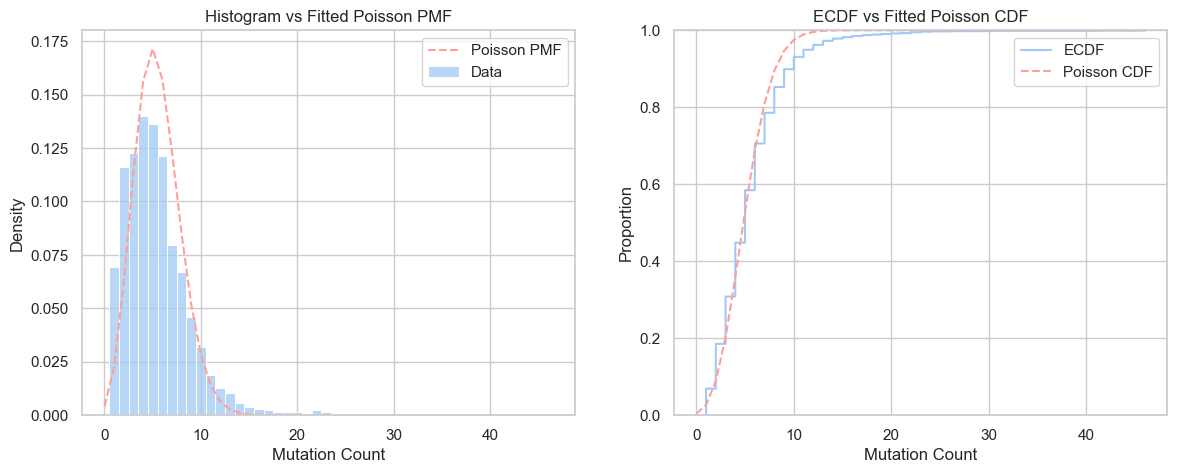

In [23]:
grid = np.arange(0, y.max() + 1)
pmf = sp.poisson.pmf(grid, mu=lambda_hat)
cdf = sp.poisson.cdf(grid, mu=lambda_hat)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram vs Poisson PMF
sns.histplot(y, stat="density", bins=len(grid), discrete=True, ax=axes[0], label="Data")
axes[0].plot(grid, pmf, "r--", label="Poisson PMF")
axes[0].set_title("Histogram vs Fitted Poisson PMF")
axes[0].legend()

# ECDF vs Poisson CDF
sns.ecdfplot(y, ax=axes[1], label="ECDF")
axes[1].plot(grid, cdf, "r--", label="Poisson CDF")
axes[1].set_title("ECDF vs Fitted Poisson CDF")
axes[1].legend()

plt.show()


The fitted Poisson model captures the general trend of the mutation count distribution but may underestimate variability. If the data show larger variance than the mean (common in genetic mutation counts), this indicates **overdispersion**, in which case a **Negative Binomial** distribution might better capture the data’s spread.

- Bootstrap the sampling density/distribution of your parameter.

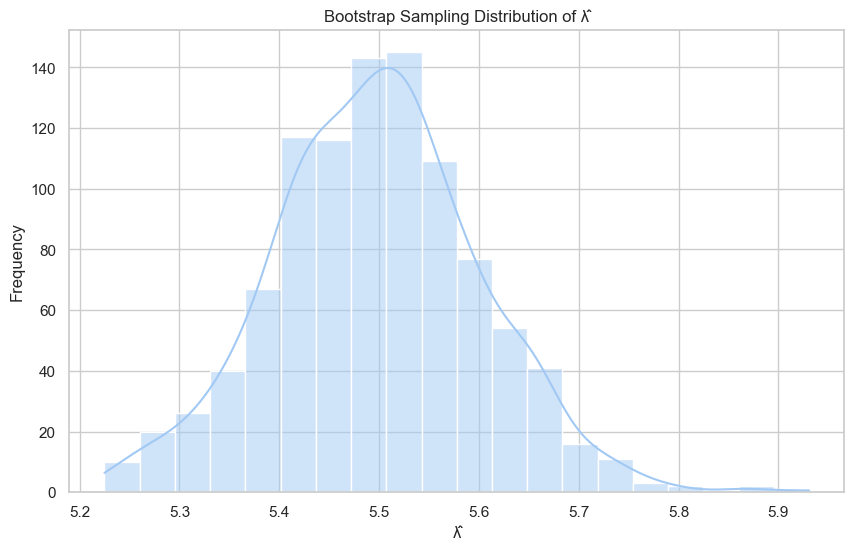

Bootstrap mean λ̂: 5.4973
Bootstrap SD: 0.1034


In [24]:
B = 1000
boot_lambda = np.array([
    y.sample(frac=1, replace=True).mean()
    for _ in range(B)
])

sns.histplot(boot_lambda, bins=20, kde=True)
plt.title("Bootstrap Sampling Distribution of λ̂")
plt.xlabel("λ̂")
plt.ylabel("Frequency")
plt.show()

print(f"Bootstrap mean λ̂: {boot_lambda.mean():.4f}")
print(f"Bootstrap SD: {boot_lambda.std():.4f}")


The bootstrap distribution of $\hat{\lambda}$ is approximately normal and centered near the MLE, indicating estimator stability. The small spread of bootstrap estimates reflects consistent mutation count averages across samples.
